# Single Exponential Smoothing

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [2]:
data= pd.read_csv(r"D:\Mahesh\IMARTICUS\Machine Learning with python\Time Series Analysis\Exponential Smoothing\practice\accidental-deaths-in-usa-monthly.csv")
data

,Month,Accidental_deaths
0,1973-01,9007
1,1973-02,8106
2,1973-03,8928
3,1973-04,9137
4,1973-05,10017
...,...,...
67,1978-08,9827
68,1978-09,9110
69,1978-10,9070
70,1978-11,8633


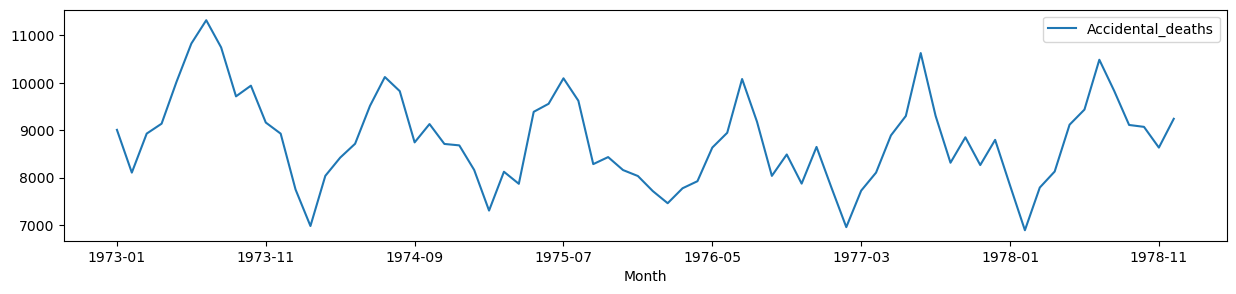

In [4]:
data.plot.line(x="Month", y="Accidental_deaths", figsize= (15,3))
plt.show()

In [5]:
data2= data.set_index("Month")
data2.head()

,Accidental_deaths
Month,
1973-01,9007
1973-02,8106
1973-03,8928
1973-04,9137
1973-05,10017


### MODEL

In [6]:
model= SimpleExpSmoothing(data2, initialization_method= "known", initial_level= 9007).fit(smoothing_level= 0.05, optimized= False)
model.params

C:\Users\mahes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


{'smoothing_level': 0.05,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 9007.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [7]:
model.fittedvalues

Month
1973-01    9007.000000
1973-02    9007.000000
1973-03    8961.950000
1973-04    8960.252500
1973-05    8969.089875
              ...     
1978-08    8648.318951
1978-09    8707.253003
1978-10    8727.390353
1978-11    8744.520835
1978-12    8738.944793
Length: 72, dtype: float64

### FORECASTING

In [8]:
fcast1 = model.forecast(1).rename(r"$\alpha=0.3$")
fcast1  

1979-01-01    8763.997554
Freq: MS, Name: $\alpha=0.3$, dtype: float64

### FORECAST PLOT

C:\Users\mahes\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1244: UserWarning: Attempting to set identical left == right == 108.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


ConversionError: Failed to convert value(s) to axis units: array([Period('1979-01', 'M')], dtype=object)

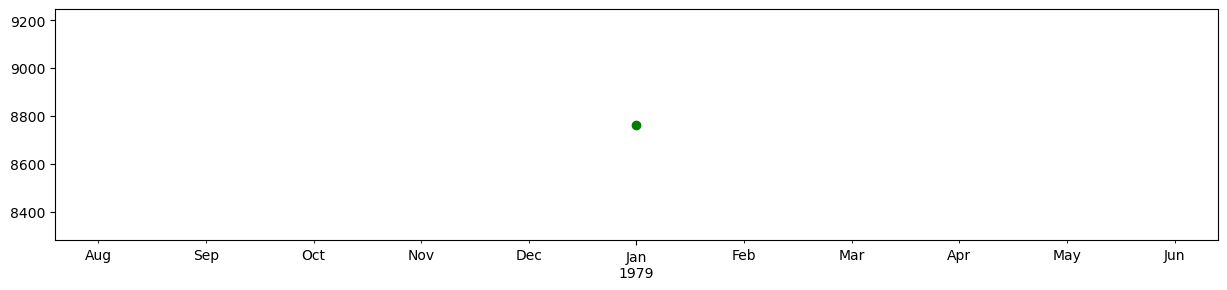

In [11]:
# plot
fcast1.plot(marker='o', color='green')
model.fittedvalues.plot(marker='o',  color='blue',figsize=(15,3))

In [12]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 1973-01 to 1978-12
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Accidental_deaths  72 non-null     int64
dtypes: int64(1)
memory usage: 1.1+ KB


In [13]:
data2["Forecast"]=model.fittedvalues
data2.head(10)

,Accidental_deaths,Forecast
Month,,
1973-01,9007,9007.000000
1973-02,8106,9007.000000
1973-03,8928,8961.950000
1973-04,9137,8960.252500
1973-05,10017,8969.089875
1973-06,10826,9021.485381
1973-07,11317,9111.711112
1973-08,10744,9221.975557
1973-09,9713,9298.076779


### Accuracy of Model

In [15]:
mean_absolute_percentage_error = np.mean(np.abs(data2.Accidental_deaths - data2.Forecast)/np.abs(data2.Accidental_deaths))*100
mean_absolute_percentage_error

8.969323512504763

# Auto model 

In [16]:
data= pd.read_csv(r"D:\Mahesh\IMARTICUS\Machine Learning with python\Time Series Analysis\Exponential Smoothing\practice\accidental-deaths-in-usa-monthly.csv")
data

,Month,Accidental_deaths
0,1973-01,9007
1,1973-02,8106
2,1973-03,8928
3,1973-04,9137
4,1973-05,10017
...,...,...
67,1978-08,9827
68,1978-09,9110
69,1978-10,9070
70,1978-11,8633


In [18]:
data2=data.set_index("Month")
data2.head()

,Accidental_deaths
Month,
1973-01,9007
1973-02,8106
1973-03,8928
1973-04,9137
1973-05,10017


In [19]:
fit_auto= SimpleExpSmoothing(data2).fit(optimized=True)
fit_auto.params

C:\Users\mahes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 9007.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [20]:
data2["Forecast"]=fit_auto.fittedvalues
data2.head()

,Accidental_deaths,Forecast
Month,,
1973-01,9007,9007.000000
1973-02,8106,9007.000000
1973-03,8928,8110.505000
1973-04,9137,8923.912525
1973-05,10017,9135.934563


### Accuracy of Model

In [21]:
mean_absolute_percentage_error = np.mean(np.abs(data2.Accidental_deaths - data2.Forecast)/np.abs(data2.Accidental_deaths))*100
mean_absolute_percentage_error

7.291098833617969

#### Auto model is best 